<a href="https://colab.research.google.com/github/rmnmndz11/Ejercicios_clase/blob/main/Proyecto_lineas_de_espera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fila de espera M/M/s/FIFO/k**

Es una variación del modelo M/M/s consistente en que la fuente de variación de entrada es limitada, esto es, el tamaño de la población de posibles clientes es finita.
Sea  $k$ el tamaño de la población, cuando en el sistema se encuentran $n$ clientes, quedan $(k-n)$ posibles clientes en la fuente de entrada.
En el modelo con población finita los clientes alternan entre estar dentro y fuera del sistema. Por analogía con el modelo M/M/s  se supone que el tiempo que pasa cada cliente fuera del sistema es una variable aleatoria exponencial $exp (λ).$  
$λ:$ Tasa de llegada $⇒λ=\frac{1}{10}$  
$𝜇:$ Tasa de servicio $⇒𝜇=\frac{1}{30}$  
$s:$ Número de servidores $⇒s=3$
$k:$ Número de espacios disponibles en el sistema  $⇒k=15$

##Ejemplo
Tres mecánicos ayudan a un pequeño taller de reparación de motores. El piso del taller puede albergar un máximo de 15 motores, excluyendo las que están en reparación. Los clientes llegan al taller cada 10 minutos en promedio, y a cada mecánico le lleva un promedio de 30 minutos para completar cada trabajo. Tanto los tiempos entre como los de servicio son exponenciales. Determine lo siguiente:   

a) La probabilidad de que haya 1, 2 y 3 mecánicos ocupados al mismo tiempo en el taller  

b) El promedio de tiempo de espera de los clientes que acuden al taller

In [1]:
!pip install simpy
import simpy
import random
import matplotlib.pyplot as plt


In [73]:
def llegada_cliente(env, servidores, espera): #Esta función representa el proceso de llegada de los clientes al taller
    i = 0
    while True:
        yield env.timeout(random.expovariate(1/10))  #Generar un tiempo entre llegadas de los clientes,
        #La función expovariate() genera números aleatorios según una distribución exponencial, y en este caso, utilizamos una tasa media de llegada de 10 clientes por unidad de tiempo.
        i += 1
        env.process(atender_cliente(env, f'Cliente {i}', servidores, espera)) #llamamos a la función atender_cliente() para que el cliente reciba servicio.

In [74]:
def atender_cliente(env, cliente, servidores, espera): #simulación del proceso de atención de un cliente en el taller.
    with servidores.request() as request:
        print(f'{cliente} llega al taller en el tiempo {env.now}') #Solicita un recurso del tipo servidores para ser atendido. El bloque with se encarga de manejar automáticamente la liberación del recurso al finalizar el proceso.
        yield request #El cliente espera hasta que se le asigna un recurso disponible para ser atendido.
        print(f'{cliente} comienza a ser atendido en el tiempo {env.now}')
        tiempo_llegada = env.now #Almacena el tiempo de llegada del cliente.
        yield env.timeout(random.expovariate(1/30))  #Simula el tiempo que el cliente pasa siendo atendido. Se utiliza una distribución exponencial con una tasa de servicio de 1/30.
        tiempo_salida = env.now #Almacena el tiempo en que el cliente termina de ser atendido.
        print(f'{cliente} termina de ser atendido en el tiempo {env.now}')

        # Calcular tiempo de espera del cliente
        tiempo_espera = tiempo_salida - tiempo_llegada #Calcula el tiempo de espera del cliente restando el tiempo de llegada al tiempo de salida.
        tiempos_espera.append(tiempo_espera) #Agrega el tiempo de espera del cliente a una lista para calcular el promedio posteriormente.

        if espera.level > 0: #Verifica si hay clientes en espera en la variable espera y, de ser así, permite que el cliente actual tome su lugar en la cola de espera.
            yield espera.get(1)

        # Imprimir el estado actual de los servidores
        print(f'Estado de los servidores en el tiempo {env.now}: {servidores.count}')

In [75]:
# Variables para contabilizar el tiempo total en que el taller tiene 1, 2 y 3 mecánicos
tiempo_taller_1_mecanico = 0
tiempo_taller_2_mecanicos = 0
tiempo_taller_3_mecanicos = 0

# Variables para contabilizar la cantidad de veces que hay 1, 2 y 3 mecánicos
cantidad_1_mecanico = 0
cantidad_2_mecanicos = 0
cantidad_3_mecanicos = 0

# Lista para almacenar los tiempos de espera de los clientes
tiempos_espera = []

# Lista para almacenar los promedios de tiempo de espera de cada simulación
promedios_tiempo_espera = []

# Listas para almacenar las probabilidades de tener 1, 2 y 3 mecánicos en cada simulación
probabilidades_1_mecanico = []
probabilidades_2_mecanicos = []
probabilidades_3_mecanicos = []

In [76]:
# Función para calcular el tiempo en que el taller tiene determinada cantidad de mecánicos
def calcular_tiempo_taller(num_mecanicos): # recibe como argumento el número de mecánicos y devuelve el tiempo total en que el taller ha tenido esa cantidad de
    if num_mecanicos == 1:
        return tiempo_taller_1_mecanico #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    elif num_mecanicos == 2:
        return tiempo_taller_2_mecanicos #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    elif num_mecanicos == 3:
        return tiempo_taller_3_mecanicos #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    else:
        return 0


In [77]:
def contar_mecanicos(env, servidores):
    global tiempo_taller_1_mecanico, tiempo_taller_2_mecanicos, tiempo_taller_3_mecanicos #representan el tiempo total en que el taller ha tenido 1, 2 y 3 mecánicos respectivamente.
    global cantidad_1_mecanico, cantidad_2_mecanicos, cantidad_3_mecanicos #representan la cantidad total de veces que el taller ha tenido 1, 2 y 3 mecánicos respectivamente.
    while True: #Verifica la cantidad de mecánicos actualmente disponibles en el recurso servidores utilizando la propiedad count.
        if servidores.count == 1:
            tiempo_taller_1_mecanico += 1 #se incrementa tiempo_taller_1_mecanico en 1 para contabilizar un intervalo de tiempo en el que el taller ha tenido 1 mecánico
            cantidad_1_mecanico += 1 # se incrementa cantidad_1_mecanico en 1 para contar la cantidad de veces que ha ocurrido
        elif servidores.count == 2:
            tiempo_taller_2_mecanicos += 1
            cantidad_2_mecanicos += 1
        elif servidores.count == 3:
            tiempo_taller_3_mecanicos += 1
            cantidad_3_mecanicos += 1
        yield env.timeout(1)

In [78]:
def simulacion():
    global probabilidad_1_mecanico, probabilidad_2_mecanicos, probabilidad_3_mecanicos
    # Configuración de la simulación
    env = simpy.Environment() #Crea un entorno de simulación utilizando la clase simpy.Environment(). El entorno es necesario para ejecutar la simulación y gestionar los eventos y procesos que ocurren en ella.
    servidores = simpy.Resource(env, capacity=3) #Crea un recurso de tipo simpy.Resource() para representar a los mecánicos del taller. El parámetro capacity=3 indica que hay tres mecánicos disponibles en el taller.
    espera = simpy.Container(env, init=15, capacity=15)  #Representar la cola de espera de los clientes en el taller. El parámetro init=15 indica que inicialmente hay 15 espacios ocupados en la cola. El parámetro capacity=15 establece la capacidad máxima de la cola, es decir, la cantidad máxima de clientes que pueden estar en espera.

    # Ejecución de la simulación
    env.process(llegada_cliente(env, servidores, espera)) #Cada vez que un cliente llega al taller, se crea un proceso para atenderlo utilizando la función atender_cliente(env, cliente, servidores, espera)
    env.process(contar_mecanicos(env, servidores)) #Inicia el proceso de conteo de mecánicos en el taller. Su objetivo es mantener un seguimiento continuo de la cantidad de mecánicos presentes en el taller y actualizar las variables correspondientes.
    env.run(until=480)  # Tiempo de simulación: 480 unidades

    # Cálculo de las probabilidades
    tiempo_simulacion = tiempo_taller_1_mecanico + tiempo_taller_2_mecanicos + tiempo_taller_3_mecanicos #Se calcula la suma del tiempo total que el taller ha tenido 1, 2 y 3 mecánicos. Esto representa la duración total de la simulación.
    probabilidad_1_mecanico = cantidad_1_mecanico / tiempo_simulacion if tiempo_simulacion > 0 else 0 #Se calcula la probabilidad de tener 1 mecánico dividiendo la cantidad de veces que se ha tenido 1 mecánico entre el tiempo total de simulación.
    #Se utiliza una expresión condicional para evitar una división por cero en caso de que el tiempo de simulación sea cero.
    probabilidad_2_mecanicos = cantidad_2_mecanicos / tiempo_simulacion if tiempo_simulacion > 0 else 0
    probabilidad_3_mecanicos = cantidad_3_mecanicos / tiempo_simulacion if tiempo_simulacion > 0 else 0

    # Cálculo del promedio de tiempo de espera y almacenamiento en la lista
    promedio_tiempo_espera = sum(tiempos_espera) / len(tiempos_espera) if tiempos_espera else 0 #Calcula el promedio del tiempo de espera de los clientes. Si la lista está vacía, lo que significa que no hubo clientes atendidos, se asigna un valor de 0 al promedio.
    print(f'Promedio de tiempo de espera de los clientes: {promedio_tiempo_espera}')
    promedios_tiempo_espera.append(promedio_tiempo_espera) #Agrega el promedio del tiempo de espera de los clientes a la lista promedios_tiempo_espera, que se utiliza posteriormente para generar la gráfica de los promedios de tiempo de espera.

    # Almacenar las probabilidades en las listas correspondientes
    probabilidades_1_mecanico.append(probabilidad_1_mecanico) #Agrega la probabilidad de tener 1 mecánico a la lista probabilidades_1_mecanico.
    probabilidades_2_mecanicos.append(probabilidad_2_mecanicos) #Agrega la probabilidad de tener 2 mecánico a la lista probabilidades_1_mecanico.
    probabilidades_3_mecanicos.append(probabilidad_3_mecanicos) #Agrega la probabilidad de tener 3 mecánico a la lista probabilidades_1_mecanico.
    return probabilidad_1_mecanico, probabilidad_2_mecanicos, probabilidad_3_mecanicos


In [79]:
def modelo(n): #Se repite n veces la simulación
  for i in range (n):
    simulacion()
      # Imprimir los resultados de cada simulación

    print(f'Probabilidad de tener 1 mecánico (Simulación {i+1}): {probabilidad_1_mecanico}')
    print(f'Probabilidad de tener 2 mecánicos (Simulación {i+1}): {probabilidad_2_mecanicos}')
    print(f'Probabilidad de tener 3 mecánicos (Simulación {i+1}): {probabilidad_3_mecanicos}')
    print('---')

In [80]:
modelo(40)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Estado de los servidores en el tiempo 60.36469357570216: 3
Cliente 6 llega al taller en el tiempo 60.858286005028596
Cliente 6 comienza a ser atendido en el tiempo 60.858286005028596
Cliente 7 llega al taller en el tiempo 62.272129044416126
Cliente 8 llega al taller en el tiempo 66.83858894384274
Cliente 2 termina de ser atendido en el tiempo 69.94135375311649
Estado de los servidores en el tiempo 69.94135375311649: 3
Cliente 7 comienza a ser atendido en el tiempo 69.94135375311649
Cliente 9 llega al taller en el tiempo 70.50350090618232
Cliente 6 termina de ser atendido en el tiempo 71.88322296383427
Estado de los servidores en el tiempo 71.88322296383427: 3
Cliente 8 comienza a ser atendido en el tiempo 71.88322296383427
Cliente 10 llega al taller en el tiempo 72.90460875672878
Cliente 5 termina de ser atendido en el tiempo 73.80033602201041
Estado de los servidores en el tiempo 73.80033602201041: 3
Cliente 9 comienza

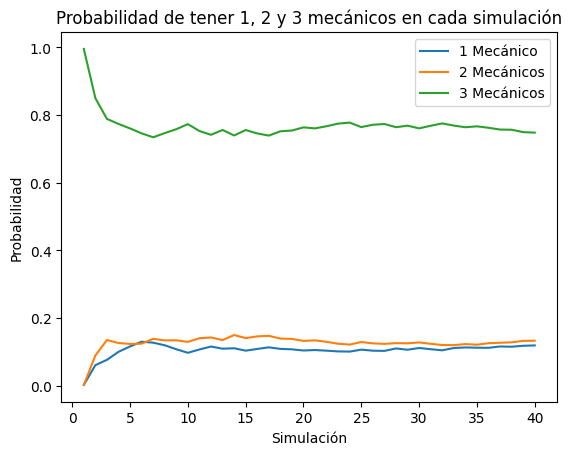

In [81]:
# Gráfica de las probabilidades de tener 1, 2 y 3 mecánicos en cada simulación
simulaciones = range(1, 41) #Crea una secuencia de números del 1 a n, que representa el número de simulaciones realizadas.
plt.plot(simulaciones, probabilidades_1_mecanico, linestyle='-', label='1 Mecánico')
plt.plot(simulaciones, probabilidades_2_mecanicos, linestyle='-', label='2 Mecánicos')
plt.plot(simulaciones, probabilidades_3_mecanicos, linestyle='-', label='3 Mecánicos')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de tener 1, 2 y 3 mecánicos en cada simulación')
plt.legend()
plt.show()

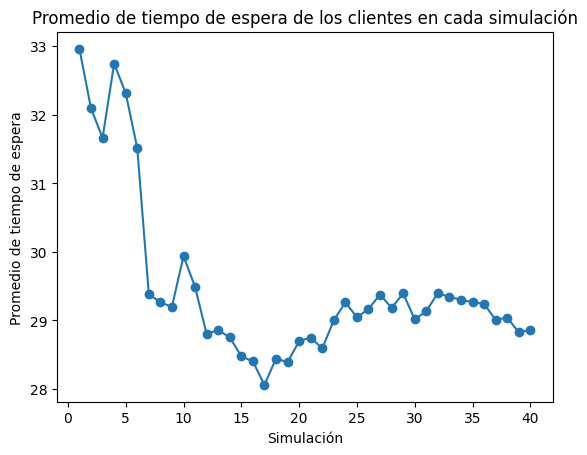

In [82]:
# Gráfica de los promedios de tiempo de espera
simulaciones = range(1, 41)
plt.plot(simulaciones, promedios_tiempo_espera, marker='o')
plt.xlabel('Simulación')
plt.ylabel('Promedio de tiempo de espera')
plt.title('Promedio de tiempo de espera de los clientes en cada simulación')
plt.show()